In [131]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [132]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [133]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/CATASTRO_2023-02-13.shp'

In [134]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

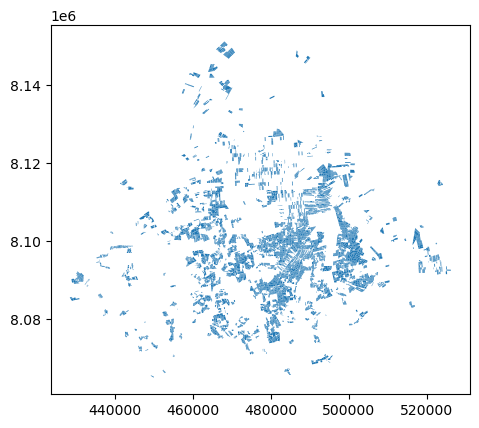

In [135]:
data.plot()
plt.show()

In [136]:
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560.0,LA_TUJA_IAG_SA,15284.0,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,FY,IAG,4,canha,79,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560.0,LA_TUJA_IAG_SA,15284.0,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,2011-05-20,FY,None,11,canha,79,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560.0,LA_TUJA_IAG_SA,15284.0,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,FY,IAG,4,canha,79,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."


In [137]:
data.crs.name

'WGS 84 / UTM zone 20S'

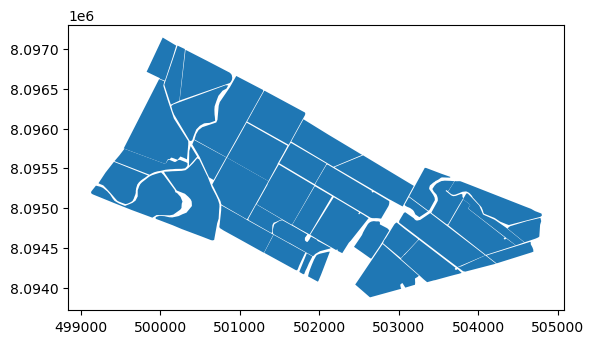

In [138]:
propiedad = data[data['unidad_01']==30]
propiedad.plot()
plt.show()

In [139]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [140]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'unidad_01':'int',
    'unidad_03':'int'
})

In [141]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
7010,00005060000L17,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,ER-L17,RB-2,2020-03-12,FY,IAG,2,canha,50,13.975706,"POLYGON Z ((501942.803 8095275.466 0.000, 5021..."
7011,00005060000L20,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,ER-L20,RENOVACION,None,F,None,122,renovacion,50,7.095109,"POLYGON Z ((501107.461 8094860.692 0.000, 5011..."
7012,0000300000L7,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,EP-L7,RBB_77-26,2022-05-11,F,PROPIO,0,canha,50,15.371285,"POLYGON Z ((501510.045 8095556.280 0.000, 5014..."


In [142]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'30_CAMPODULCE'

In [143]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,soca,cultivo,zona,area,geometry
7010,00005060000L17,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,ER-L17,RB-2,2020-03-12,FY,IAG,2,canha,50,13.975706,"POLYGON Z ((501942.803 8095275.466 0.000, 5021..."
7011,00005060000L20,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,ER-L20,RENOVACION,None,F,None,122,renovacion,50,7.095109,"POLYGON Z ((501107.461 8094860.692 0.000, 5011..."
7012,0000300000L7,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,EP-L7,RBB_77-26,2022-05-11,F,PROPIO,0,canha,50,15.371285,"POLYGON Z ((501510.045 8095556.280 0.000, 5014..."
7013,0000300000L8,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,EP-L8,RB-2,2021-05-09,FY,IAG,1,canha,50,27.445201,"POLYGON Z ((502662.752 8095215.781 0.000, 5026..."
7014,0000300000L9,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,EP-L9,UCG_90-20,2021-05-10,F,IAG,1,canha,50,23.347786,"POLYGON Z ((501646.256 8095837.263 0.000, 5018..."


In [144]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [145]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [146]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
7010,00005060000L17,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,ER-L17,RB-2,2020-03-12,FY,IAG,...,13.975706,RB-2,2020-03-12,2,,0,41594,30,00005060000L17,0
7011,00005060000L20,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,ER-L20,RENOVACION,None,F,None,...,7.095109,RENOVACION,None,122,,0,41594,30,00005060000L20,0
7012,0000300000L7,30,CAMPODULCE,41594,AGROPECUARIA_CAMPO_DULCE_S.R.L.,EP-L7,RBB_77-26,2022-05-11,F,PROPIO,...,15.371285,RBB_77-26,2022-05-11,0,,0,41594,30,0000300000L7,0


In [147]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [148]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [149]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
7010,"POLYGON Z ((501942.803 8095275.466 0.000, 5021...",ER-L17,FY,13.975706,RB-2,2020-03-12,2,,0,41594,30,00005060000L17,0
7011,"POLYGON Z ((501107.461 8094860.692 0.000, 5011...",ER-L20,F,7.095109,RENOVACION,None,122,,0,41594,30,00005060000L20,0
7012,"POLYGON Z ((501510.045 8095556.280 0.000, 5014...",EP-L7,F,15.371285,RBB_77-26,2022-05-11,0,,0,41594,30,0000300000L7,0
7013,"POLYGON Z ((502662.752 8095215.781 0.000, 5026...",EP-L8,FY,27.445201,RB-2,2021-05-09,1,,0,41594,30,0000300000L8,0
7014,"POLYGON Z ((501646.256 8095837.263 0.000, 5018...",EP-L9,F,23.347786,UCG_90-20,2021-05-10,1,,0,41594,30,0000300000L9,0


In [150]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [151]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [152]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [153]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
7010,"POLYGON Z ((501942.803 8095275.466 0.000, 5021...",ER-L17,FY,13.975706,RB-2,20200312,2,SOCA,0,41594,30,00005060000L17,0
7011,"POLYGON Z ((501107.461 8094860.692 0.000, 5011...",ER-L20,F,7.095109,RENOVACION,0,122,RENOVACION,0,41594,30,00005060000L20,0
7012,"POLYGON Z ((501510.045 8095556.280 0.000, 5014...",EP-L7,F,15.371285,RBB_77-26,20220511,0,HOJA,0,41594,30,0000300000L7,0
7013,"POLYGON Z ((502662.752 8095215.781 0.000, 5026...",EP-L8,FY,27.445201,RB-2,20210509,1,SOCA,0,41594,30,0000300000L8,0
7014,"POLYGON Z ((501646.256 8095837.263 0.000, 5018...",EP-L9,F,23.347786,UCG_90-20,20210510,1,SOCA,0,41594,30,0000300000L9,0


In [154]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [155]:
tchs = pd.read_excel(fp_tch)

In [156]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,...,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES,Unnamed: 20
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,...,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,...,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO,NaN
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,...,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO,NaN


In [157]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [158]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int',
    'COD_PROP':'int'
})

In [159]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
7010,"POLYGON Z ((501942.803 8095275.466 0.000, 5021...",ER-L17,FY,13.975706,RB-2,20200312,2,SOCA,53.327902,41594,30,00005060000L17,0
7011,"POLYGON Z ((501107.461 8094860.692 0.000, 5011...",ER-L20,F,7.095109,RENOVACION,0,122,RENOVACION,53.327902,41594,30,00005060000L20,0
7012,"POLYGON Z ((501510.045 8095556.280 0.000, 5014...",EP-L7,F,15.371285,RBB_77-26,20220511,0,HOJA,53.327902,41594,30,0000300000L7,0


In [160]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [161]:
bloques = pd.read_excel(fp_bloques)

In [162]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [163]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [164]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
7010,"POLYGON Z ((501942.803 8095275.466 0.000, 5021...",ER-L17,FY,13.975706,RB-2,20200312,2,SOCA,53.327902,41594,30,00005060000L17,358
7011,"POLYGON Z ((501107.461 8094860.692 0.000, 5011...",ER-L20,F,7.095109,RENOVACION,0,122,RENOVACION,53.327902,41594,30,00005060000L20,358
7012,"POLYGON Z ((501510.045 8095556.280 0.000, 5014...",EP-L7,F,15.371285,RBB_77-26,20220511,0,HOJA,53.327902,41594,30,0000300000L7,358


In [165]:
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)

In [166]:
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
7010,"POLYGON Z ((501942.803 8095275.466 0.000, 5021...",ER-L17,FY,13.975706,RB-2,20200312,2,SOCA,53.327902,41594,30,0000300000ER-L17,358
7011,"POLYGON Z ((501107.461 8094860.692 0.000, 5011...",ER-L20,F,7.095109,RENOVACION,0,122,RENOVACION,53.327902,41594,30,0000300000ER-L20,358
7012,"POLYGON Z ((501510.045 8095556.280 0.000, 5014...",EP-L7,F,15.371285,RBB_77-26,20220511,0,HOJA,53.327902,41594,30,0000300000EP-L7,358


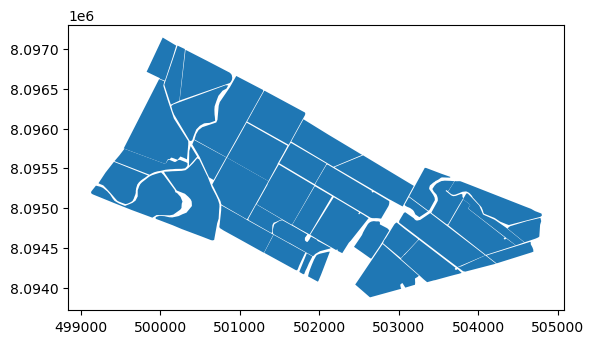

In [167]:
propiedad.plot()
plt.show()

In [168]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [169]:
propiedad['SUPERFICIE'].sum()

767.25909367154

In [170]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
7010,"POLYGON Z ((501942.803 8095275.466 0.000, 5021...",ER-L17,FY,13.975706,RB-2,20200312,2,SOCA,53.327902,41594,30,0000300000ER-L17,358
7011,"POLYGON Z ((501107.461 8094860.692 0.000, 5011...",ER-L20,F,7.095109,RENOVACION,0,122,RENOVACION,53.327902,41594,30,0000300000ER-L20,358
7012,"POLYGON Z ((501510.045 8095556.280 0.000, 5014...",EP-L7,F,15.371285,RBB 77-26,20220511,0,HOJA,53.327902,41594,30,0000300000EP-L7,358
7013,"POLYGON Z ((502662.752 8095215.781 0.000, 5026...",EP-L8,FY,27.445201,RB-2,20210509,1,SOCA,53.327902,41594,30,0000300000EP-L8,358
7014,"POLYGON Z ((501646.256 8095837.263 0.000, 5018...",EP-L9,F,23.347786,UCG 90-20,20210510,1,SOCA,53.327902,41594,30,0000300000EP-L9,358


In [171]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [172]:
propiedad = propiedad.to_crs(epsg=4326)

In [173]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [174]:
file_name + '.geojson'

'30_CAMPODULCE.geojson'

In [175]:
#file_name='d'

In [176]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [177]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [178]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\30_CAMPODULCE.geojson'

In [179]:
propiedad.to_file(out_dir, driver='GeoJSON')